In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

In [3]:
url = 'https://raw.githubusercontent.com/sussykeem/eos_predictor/refs/heads/main/preprocessed_data%20-%20preprocessed_data.csv'

In [80]:
data = pd.read_csv(url)

x_cols = ['sci_name','name','cid','smile','Molecular Weight','LogP','TPSA','Rotatable Bonds','H Bond Donors','H Bond Acceptors','Aromatic Rings','Num Rings','Atom Count','coulomb_matrix','embeddings']
y_cols = ['a', 'b']

X = data[x_cols].to_numpy()
y = data[y_cols].to_numpy()

(165, 15) (165, 2)
(55, 15) (55, 2)


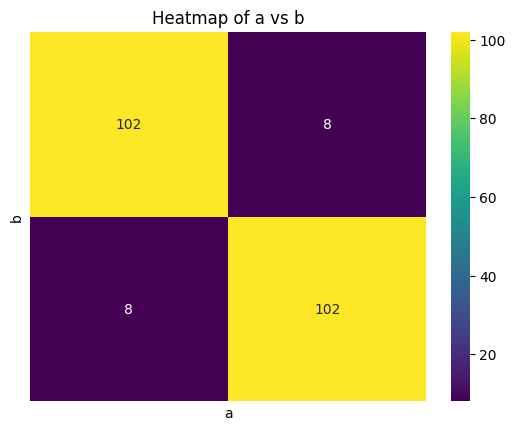

In [81]:
n_bins = 2
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
y_binned = discretizer.fit_transform(y)

y_stratify = np.array([f'{int(a)}_{int(b)}' for a,b in y_binned])

unique, counts = np.unique(y_stratify, return_counts=True)
bin_distribution = dict(zip(unique, counts))

n = int(np.sqrt(len(bin_distribution)))

heatmap = np.empty((n, n))

for i in range(n):
    for j in range(n):
        heatmap[i,j] = bin_distribution[f'{i}_{j}']

sns.heatmap(heatmap, cmap='viridis', xticklabels=False, yticklabels=False, annot=True, fmt='g')  # Choose desired colormap

# Set plot labels and title
plt.xlabel('a')
plt.ylabel('b')
plt.title('Heatmap of a vs b')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y_stratify
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

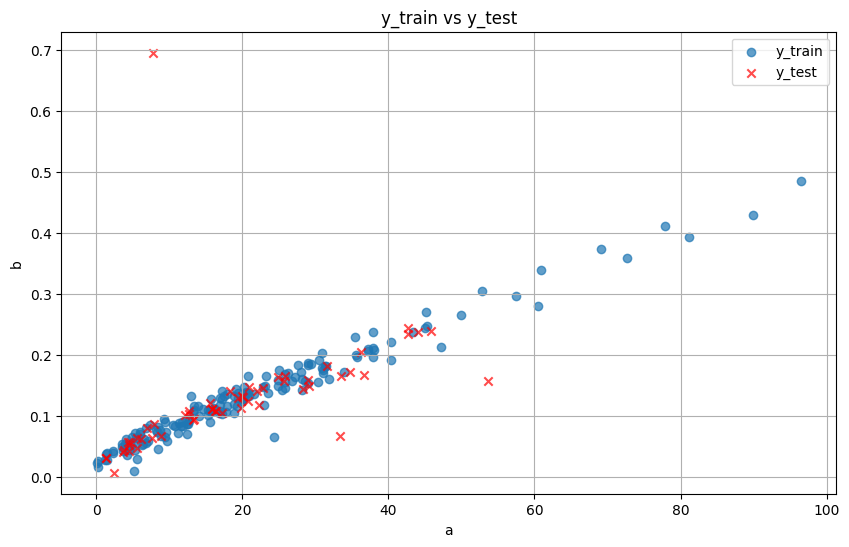

In [82]:
# prompt: graph ytrain a vs ytrain b, and y_test on the same graph

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Plot y_train a vs y_train b
plt.scatter(y_train[:, 0], y_train[:, 1], label='y_train', alpha=0.7)

# Plot y_test
plt.scatter(y_test[:, 0], y_test[:, 1], label='y_test', alpha=0.7, marker='x', color='red')

plt.xlabel('a')
plt.ylabel('b')
plt.title('y_train vs y_test')
plt.legend()
plt.grid(True)
plt.show()


In [83]:
train_data = pd.DataFrame(np.concatenate((X_train, y_train), axis=1), columns=x_cols+y_cols)
test_data = pd.DataFrame(np.concatenate((X_test, y_test), axis=1), columns=x_cols+y_cols)

train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)